In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
UNCLASSIFIED = False
NOISE = -1

In [2]:
def _dist(p,q):
    # compute and return the euclidean distance
    # put your code here
    return(np.linalg.norm(p-q , axis = 0))

In [3]:
def _eps_neighborhood(p,q,eps):
    ans = (_dist(p , q) <= eps)
    return(ans)
    # check if the distance between p and q is below eps
    # return True or False
    # put your code here

In [4]:
def _region_query(m, point_id, eps):
    seeds = np.array(range(m.shape[1]))[_eps_neighborhood(m[:,point_id],m,eps)]
    # find and return all points that belong to eps-neighborhood of point_id
    # put your code here
    return seeds

In [5]:
def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    classifications[point_id] = cluster_id
    if len(_region_query(m , point_id , eps))<min_points:
        return(False)
        #若周圍點小於min_points則不屬於core，return False.
    while True:
        s = np.array(classifications).sum()
        #用以計算loop前後被分類的點數量是否相同
        in_cluster_list = []
        #屬於此clsuter_id的點list
        for i , p in enumerate(classifications):
            if classifications[i]==cluster_id:
                #檢查所有屬於此cluster的點是否為core
                if len(_region_query(m , i , eps))>=min_points:
                    #若為core則將這些點周圍的其他點放入上面的in_cluster_list
                    in_cluster_list += list(_region_query(m , i , eps))
            else:
                continue
        
        for i in set(in_cluster_list):
            #更新classifications
            classifications[i] = cluster_id
        if np.array(classifications).sum() == s:
            #如果classifications中被分類的點不再增加則break
            break
        else:
            continue   
    return(classifications)  
    # expand the cluster of cluster_id from point_id
    # identify all points belonging to cluster_id
    # update the clustering results in "classification" by assigning cluster_id to each point
    # return True if point_id is a core, False if point_id is not a core
    # write your code below
    

In [6]:
def dbscan(m, eps, min_points):
    """Implementation of DBSCAN
    You can refer to wikipedia for detailed algorithm: https://en.wikipedia.org/wiki/DBSCAN
    Use Euclidean Distance as the measure
    
    Inputs:
    m - A matrix whose columns are feature vectors
    eps - Maximum distance two points can be to be regionally related
    min_points - The minimum number of points to make a cluster
    
    Outputs:
    An array with either a cluster id number or dbscan.NOISE (None) for each column vector in m
    """
    cluster_id = 1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    for i , c in enumerate(classifications):
        if c:
            #若點已經被分類則跳過
            continue
        else:
            #若未被分類則對其做_epxand_cluster
            l = _expand_cluster(m, classifications, i, cluster_id, eps, min_points)
            if l:
                #若周圍點大於min_points則l為新的classifications
                classifications = l
                cluster_id+=1
            else:
                #若周圍點小於min_points則l為False，將其分入cluster 0 （不知道為什麼用None會報錯QQ）
                classifications[i] = 0
                #classifications[i] = None
                
    # the main dbscan algorithm
    # put your code here
    return np.array(classifications)

In [7]:
# test here
dataset_1 = pd.read_csv('blobs.csv')[:80].values
m = np.asmatrix(dataset_1)
m = m.transpose()

In [8]:
eps = 1.6
min_points = 5
a = dbscan(m, eps, min_points)

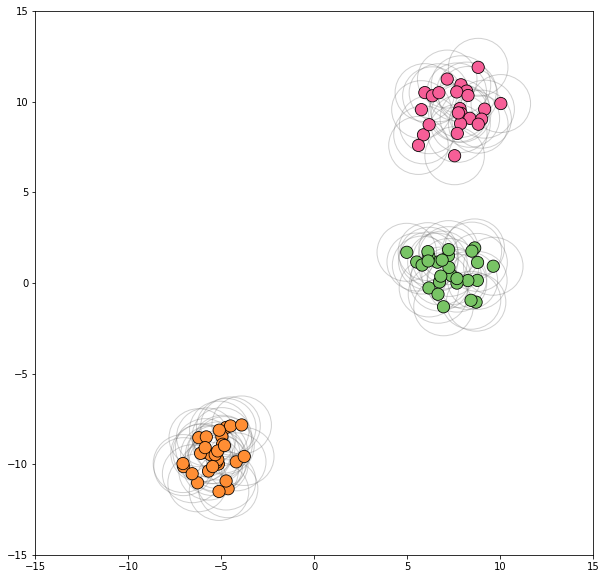

In [9]:
%matplotlib inline
import dbscan_lab_helper as helper

result = np.asarray(a)
helper.plot_clustered_dataset(dataset_1, result, neighborhood=True, epsilon=eps)

In [10]:
dataset_2 = pd.read_csv('varied.csv')[:300].values
m = np.asmatrix(dataset_2)
m = m.transpose()

In [11]:
eps = 1.3
min_points = 5
a = dbscan(m, eps, min_points)

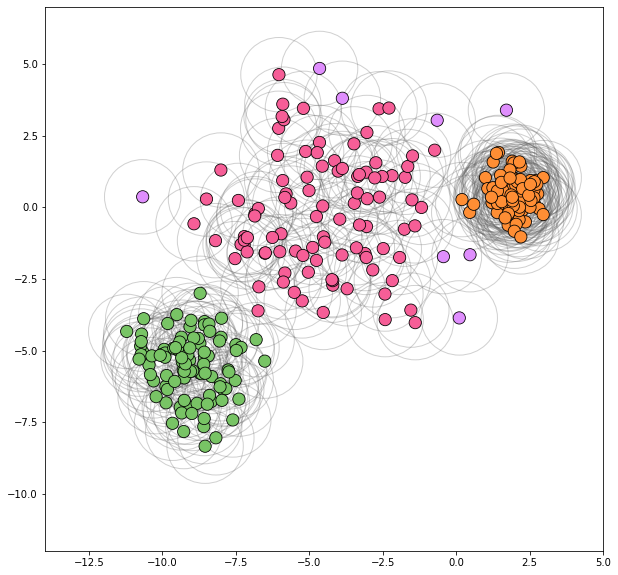

In [12]:
result = np.asarray(a)
helper.plot_clustered_dataset(dataset_2, result, xlim=(-14, 5), ylim=(-12, 7), neighborhood=True, epsilon=eps)

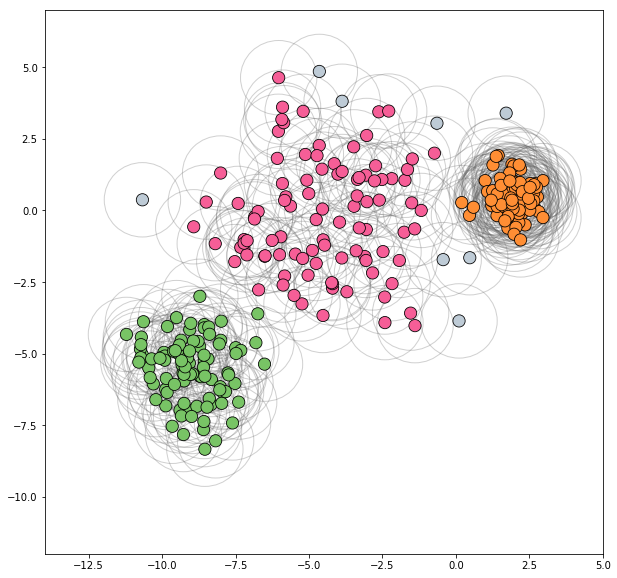

In [12]:
result = np.asarray(a)
helper.plot_clustered_dataset(dataset_2, result, xlim=(-14, 5), ylim=(-12, 7), neighborhood=True, epsilon=eps)
